# Sentiment Analysis of Financial News Headlines
## Appling NLP techniques to classify a news headline containing financial information into either one of the sentiments (Positive, Negative or Neutral)

### Dataset:
https://raw.githubusercontent.com/subashgandyer/datasets/main/financial_news_headlines_sentiment.csv

### Steps
- 1. Download the dataset
- 2. Load the dataset
- 3. Explore the dataset (Exploratory Data Analysis)
- 4. Clean the data
- 5. Apply SMOTE for imbalanced data [Optional] --> Carries Bonus Marks
- 6. Build a BoW model
- 7. Build a Tf-Idf model
- 8. Split train and test data
- 9. Use one ML Classifying algorithm to classify the finanical news headline data
- 10. Use another ML classifying algorithm to classify them
- 11. Plot Confusion matrix

## 1. Download the dataset [1 point]

In [ ]:
#! pip install mplcyberpunk

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import mplcyberpunk


In [19]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [24]:
url = "https://raw.githubusercontent.com/subashgandyer/datasets/main/financial_news_headlines_sentiment.csv"
data = pd.read_csv(url, encoding='latin1')

In [25]:
data.columns = ['sentiment', 'headline']

print(data.head())
print(data.isnull().sum())
print(data['sentiment'].value_counts())

  sentiment                                           headline
0   neutral  Technopolis plans to develop in stages an area...
1  negative  The international electronic industry company ...
2  positive  With the new production plant the company woul...
3  positive  According to the company 's updated strategy f...
4  positive  FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...
sentiment    0
headline     0
dtype: int64
sentiment
neutral     2878
positive    1363
negative     604
Name: count, dtype: int64


- EDA

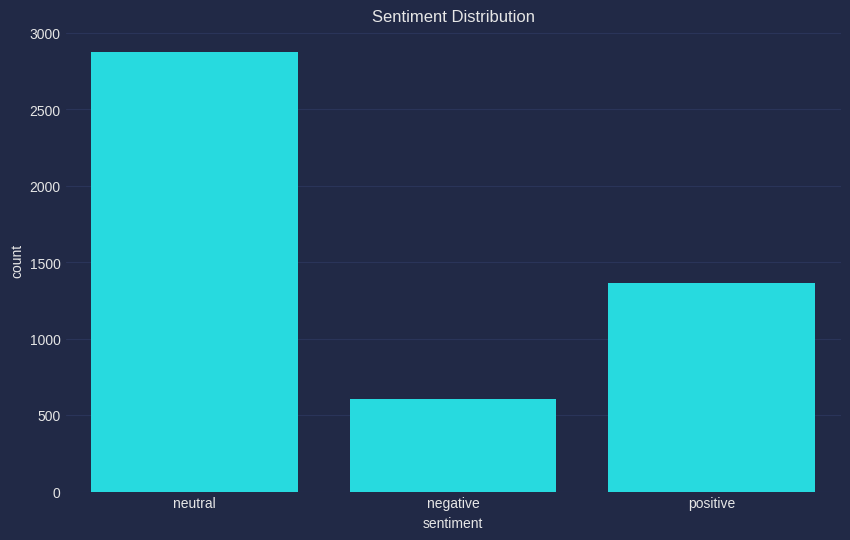

In [40]:
plt.style.use("cyberpunk")
plt.figure(figsize=(10, 6))
sns.countplot(x='sentiment', data=data)
plt.title("Sentiment Distribution")
plt.show()


- 4. Clean the data

In [30]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    tokens = word_tokenize(text.lower())
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word.isalpha() and word not in stop_words]
    return " ".join(tokens)

data['cleaned_headline'] = data['headline'].apply(preprocess)

In [31]:
# feature for bow anf tfidf
bow_vectorizer = CountVectorizer(max_features=1000)
X_bow = bow_vectorizer.fit_transform(data['cleaned_headline']).toarray()

tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X_tfidf = tfidf_vectorizer.fit_transform(data['cleaned_headline']).toarray()

- 5. SMOTE (Imbalanced dataset)


In [32]:
smote = SMOTE(random_state=42)
X_bow_resampled, y_resampled_bow = smote.fit_resample(X_bow, data['sentiment'])
X_tfidf_resampled, y_resampled_tfidf = smote.fit_resample(X_tfidf, data['sentiment'])


In [33]:
# train test slip for bow and tfidf

In [35]:
X_train_bow, X_test_bow, y_train_bow, y_test_bow = train_test_split(X_bow_resampled, y_resampled_bow, test_size=0.2, random_state=42)

X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(X_tfidf_resampled, y_resampled_tfidf, test_size=0.2, random_state=42)

- Classification Algorithm [Logistic]
- Train
- Predict

In [36]:
lr_model_bow = LogisticRegression()
lr_model_bow.fit(X_train_bow, y_train_bow)
y_pred_lr_bow = lr_model_bow.predict(X_test_bow)

# Logistic Regression Classifier on TF-IDF
lr_model_tfidf = LogisticRegression()
lr_model_tfidf.fit(X_train_tfidf, y_train_tfidf)
y_pred_lr_tfidf = lr_model_tfidf.predict(X_test_tfidf)

Another Classification Algorithm [Random Forest]
- Train
- Predict

In [37]:
rf_model_bow = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_bow.fit(X_train_bow, y_train_bow)
y_pred_rf_bow = rf_model_bow.predict(X_test_bow)

# Random Forest Classifier on TF-IDF
rf_model_tfidf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_tfidf.fit(X_train_tfidf, y_train_tfidf)
y_pred_rf_tfidf = rf_model_tfidf.predict(X_test_tfidf)

- Confusion Matrixes for two classification algorithms and two feature extractor methods

In [38]:
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Positive', 'Negative', 'Neutral'],
                yticklabels=['Positive', 'Negative', 'Neutral'])
    plt.title(title)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()



In [39]:
# logistic regression

Logistic Regression (BoW) Classification Report:
              precision    recall  f1-score   support

    negative       0.69      0.87      0.77       580
     neutral       0.79      0.72      0.75       574
    positive       0.68      0.57      0.62       573

    accuracy                           0.72      1727
   macro avg       0.72      0.72      0.71      1727
weighted avg       0.72      0.72      0.71      1727



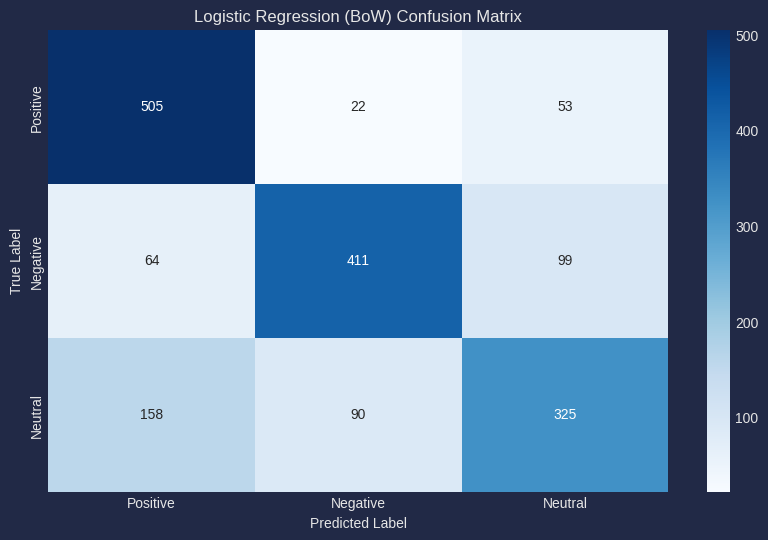

Logistic Regression (TF-IDF) Classification Report:
              precision    recall  f1-score   support

    negative       0.87      0.92      0.89       580
     neutral       0.77      0.76      0.76       574
    positive       0.78      0.74      0.76       573

    accuracy                           0.81      1727
   macro avg       0.80      0.81      0.80      1727
weighted avg       0.80      0.81      0.81      1727



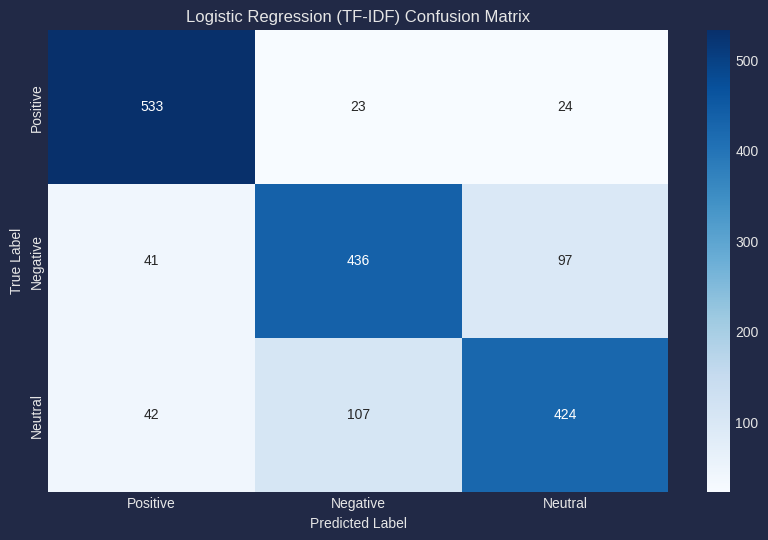

In [41]:
print("Logistic Regression (BoW) Classification Report:")
print(classification_report(y_test_bow, y_pred_lr_bow))

plt.style.use("cyberpunk")
plt.figure(figsize=(10, 6))
plot_confusion_matrix(y_test_bow, y_pred_lr_bow, "Logistic Regression (BoW) Confusion Matrix")

print("Logistic Regression (TF-IDF) Classification Report:")
print(classification_report(y_test_tfidf, y_pred_lr_tfidf))

plt.style.use("cyberpunk")
plt.figure(figsize=(10, 6))
plot_confusion_matrix(y_test_tfidf, y_pred_lr_tfidf, "Logistic Regression (TF-IDF) Confusion Matrix")



Random Forest (BoW) Classification Report:
              precision    recall  f1-score   support

    negative       0.72      0.88      0.79       580
     neutral       0.78      0.70      0.74       574
    positive       0.67      0.59      0.63       573

    accuracy                           0.72      1727
   macro avg       0.73      0.72      0.72      1727
weighted avg       0.73      0.72      0.72      1727



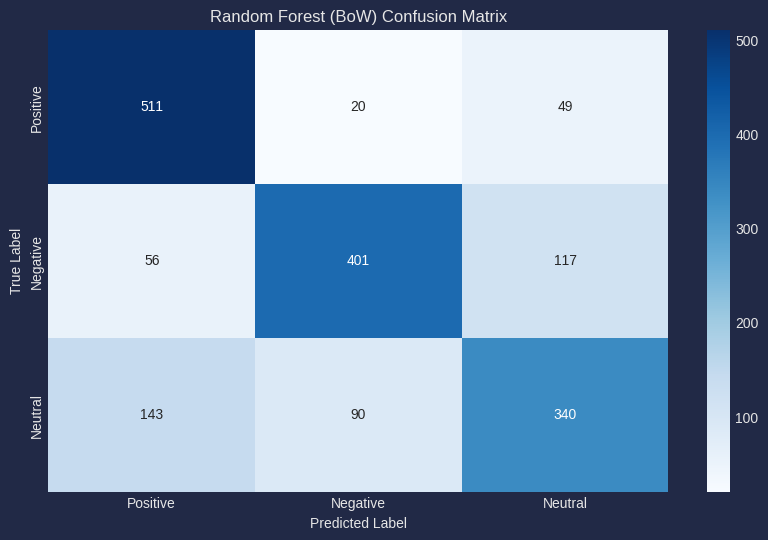

Random Forest (TF-IDF) Classification Report:
              precision    recall  f1-score   support

    negative       0.95      0.95      0.95       580
     neutral       0.84      0.86      0.85       574
    positive       0.87      0.85      0.86       573

    accuracy                           0.88      1727
   macro avg       0.88      0.88      0.88      1727
weighted avg       0.88      0.88      0.88      1727



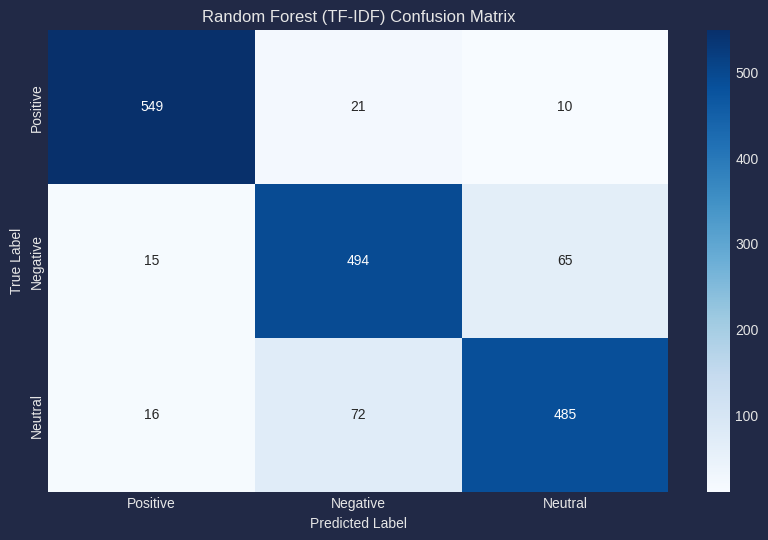

In [42]:
plt.style.use("cyberpunk")
plt.figure(figsize=(10, 6))
print("Random Forest (BoW) Classification Report:")

print(classification_report(y_test_bow, y_pred_rf_bow))
plot_confusion_matrix(y_test_bow, y_pred_rf_bow, "Random Forest (BoW) Confusion Matrix")

print("Random Forest (TF-IDF) Classification Report:")
print(classification_report(y_test_tfidf, y_pred_rf_tfidf))

plt.style.use("cyberpunk")
plt.figure(figsize=(10, 6))
plot_confusion_matrix(y_test_tfidf, y_pred_rf_tfidf, "Random Forest (TF-IDF) Confusion Matrix")